In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('train.csv', delimiter=';')

In [3]:
df.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,"83,74","3172,92","181,48","24,83","9,6",0,0,"24,83","9,6","24,83","9,6",0,0,36,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,"1,46","1273,88","92,11","211,78","28,98","5,75","13,85","206,03","15,13","211,78","28,98",0,0,57,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0,"31,95","763,19","48,13","77,22","9,33","4,9","38,8","72,32","48,13","77,22",0,0,64,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,"117,49","529,19","1506,4","127,67","49,3","6,25","0,2","120,07","49,1","127,67","49,3",0,0,148,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0,"38,24","3493,18","389,98","72,78","16,72","4,28","373,27","68,5","389,98","72,78",0,0,86,28,17,5,69,23,86,28,0,0,0


In [4]:
df.describe()

,C1,C2,C3,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
count,5.140090e+05,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.00000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000
mean,3.125269e+15,327890.745425,31.630411,49.656251,29.079176,10.447070,7.747530,38.66520,21.243424,49.609273,29.059777,0.046978,0.019398,0.049307
std,8.589417e+14,51107.511245,0.929149,58.781180,31.241034,14.888752,11.964678,50.26614,24.155985,58.757945,31.233367,0.708441,0.349181,0.216507
min,3.530330e+05,3138.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.231393e+15,323531.000000,31.000000,4.000000,8.000000,0.000000,1.000000,2.00000,4.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,3.337374e+15,343230.000000,31.000000,32.000000,20.000000,5.000000,4.000000,21.00000,14.000000,32.000000,20.000000,0.000000,0.000000,0.000000
75%,3.437364e+15,343636.000000,33.000000,73.000000,40.000000,15.000000,10.000000,56.00000,30.000000,73.000000,40.000000,0.000000,0.000000,0.000000
max,3.536383e+15,353036.000000,33.000000,1346.000000,1258.000000,430.000000,499.000000,1109.00000,1024.000000,1346.000000,1258.000000,118.000000,99.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514009 entries, 0 to 514008
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   C1      514009 non-null  int64 
 1   C2      514009 non-null  int64 
 2   C3      514009 non-null  int64 
 3   N1      514009 non-null  object
 4   N2      514009 non-null  object
 5   N3      514009 non-null  object
 6   N4      514009 non-null  object
 7   N5      514009 non-null  object
 8   N6      514009 non-null  object
 9   N7      514009 non-null  object
 10  N8      514009 non-null  object
 11  N9      514009 non-null  object
 12  N10     514009 non-null  object
 13  N11     514009 non-null  object
 14  N12     514009 non-null  object
 15  N13     514009 non-null  object
 16  N14     514009 non-null  int64 
 17  N15     514009 non-null  int64 
 18  N16     514009 non-null  int64 
 19  N17     514009 non-null  int64 
 20  N18     514009 non-null  int64 
 21  N19     514009 non-null  int64 
 

In [6]:
#no null data
df.isna().any()

C1        False
C2        False
C3        False
N1        False
N2        False
N3        False
N4        False
N5        False
N6        False
N7        False
N8        False
N9        False
N10       False
N11       False
N12       False
N13       False
N14       False
N15       False
N16       False
N17       False
N18       False
N19       False
N20       False
N21       False
N22       False
N23       False
TARGET    False
dtype: bool

In [7]:
df['TARGET'].value_counts()

0    488665
1     25344
Name: TARGET, dtype: int64

# Change data types to numeric

In [8]:
df['N1']=df['N1'].apply(lambda x: x.replace(',','.'))
df['N2']=df['N2'].apply(lambda x: x.replace(',','.'))
df['N3']=df['N3'].apply(lambda x: x.replace(',','.'))
df['N4']=df['N4'].apply(lambda x: x.replace(',','.'))
df['N5']=df['N5'].apply(lambda x: x.replace(',','.'))
df['N6']=df['N6'].apply(lambda x: x.replace(',','.'))
df['N7']=df['N7'].apply(lambda x: x.replace(',','.'))
df['N8']=df['N8'].apply(lambda x: x.replace(',','.'))
df['N9']=df['N9'].apply(lambda x: x.replace(',','.'))
df['N10']=df['N10'].apply(lambda x: x.replace(',','.'))
df['N11']=df['N11'].apply(lambda x: x.replace(',','.'))
df['N12']=df['N12'].apply(lambda x: x.replace(',','.'))
df['N13']=df['N13'].apply(lambda x: x.replace(',','.'))

df.iloc[:,3:16] = df.iloc[:,3:16].apply(pd.to_numeric)
df= df.astype({'C1':'object','C2':'object','C3':'object'})


# Exploring data

In [9]:
df.groupby('TARGET').mean()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23
TARGET,,,,,,,,,,,,,,,,,,,,,,,
0,46.307194,972.569412,2991.996663,112.730518,64.661364,13.369365,9.790309,98.210518,54.702164,112.658843,64.629220,0.071674,0.032129,51.686771,30.104018,10.855246,8.022113,40.276197,21.991681,51.641245,30.084845,0.045526,0.019173
1,11.113646,208.031983,634.503540,23.017050,25.107842,3.211506,3.188477,19.227060,21.838249,22.892680,25.072048,0.124368,0.035784,10.505208,9.318892,2.576902,2.453204,7.603101,6.816051,10.430240,9.295139,0.074968,0.023753


ValueError: num must be 1 <= num <= 18, not 19

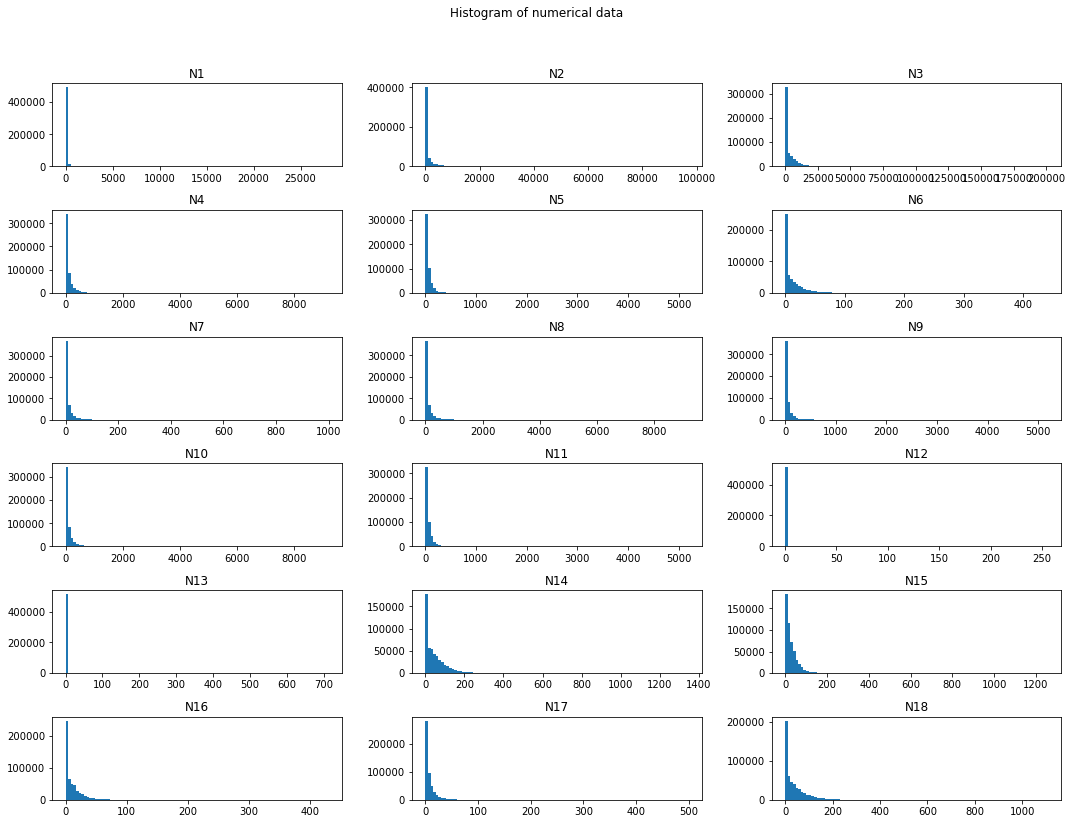

In [10]:
df2=df.iloc[:,3:26] #просмотреть распределение числовых данных

fig = plt.figure(figsize = (15,12))
plt.suptitle('Histogram of numerical data')

for i in range(df2.shape[1]):
    plt.subplot(6, 3, i+1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])
    vals=np.size(df2.iloc[:,i].unique())
    if vals >=100:
        vals =100
    
    plt.hist(df2.iloc[:,i],bins =vals)
    plt.tight_layout(rect=[0,0.03,1,0.95])
        



#vals = np.size(df2.iloc[:,i].unique())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514009 entries, 0 to 514008
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      514009 non-null  object 
 1   C2      514009 non-null  object 
 2   C3      514009 non-null  object 
 3   N1      514009 non-null  float64
 4   N2      514009 non-null  float64
 5   N3      514009 non-null  float64
 6   N4      514009 non-null  float64
 7   N5      514009 non-null  float64
 8   N6      514009 non-null  float64
 9   N7      514009 non-null  float64
 10  N8      514009 non-null  float64
 11  N9      514009 non-null  float64
 12  N10     514009 non-null  float64
 13  N11     514009 non-null  float64
 14  N12     514009 non-null  float64
 15  N13     514009 non-null  float64
 16  N14     514009 non-null  int64  
 17  N15     514009 non-null  int64  
 18  N16     514009 non-null  int64  
 19  N17     514009 non-null  int64  
 20  N18     514009 non-null  int64  
 21  N19     51

Text(0.5, 0, 'Churn')

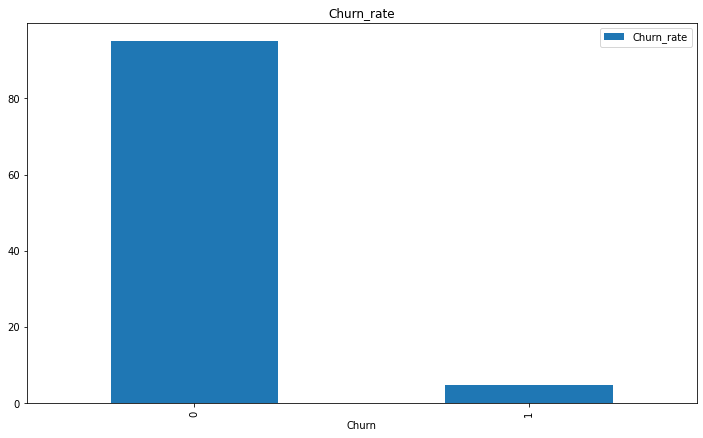

In [13]:
churn_rate = df[['C1','TARGET']]
churn_rate['Subscriber'] = churn_rate['C1']
churn_rate = pd.DataFrame(churn_rate.groupby('TARGET')['Subscriber'].count())

churn_rate['Churn_rate']=(churn_rate['Subscriber']/sum(churn_rate['Subscriber']))*100

ax=churn_rate[['Churn_rate']].plot.bar(title='Churn_rate', table = False, legend = True, figsize = (12,7))

plt.xlabel('Churn', horizontalalignment='center')


#### 

Text(0.5, 1.0, 'Churn Rate by C3')

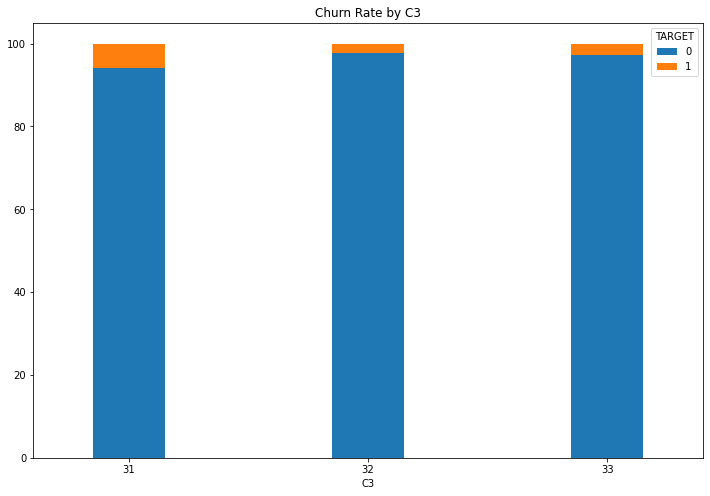

In [14]:
df_c3 = df.groupby(['C3','TARGET']).size().unstack()
ax = (df_c3.T*100/df_c3.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot =0, figsize = (12,8))
plt.title('Churn Rate by C3')

Text(0.5, 1.0, 'Churn Rate by C3')

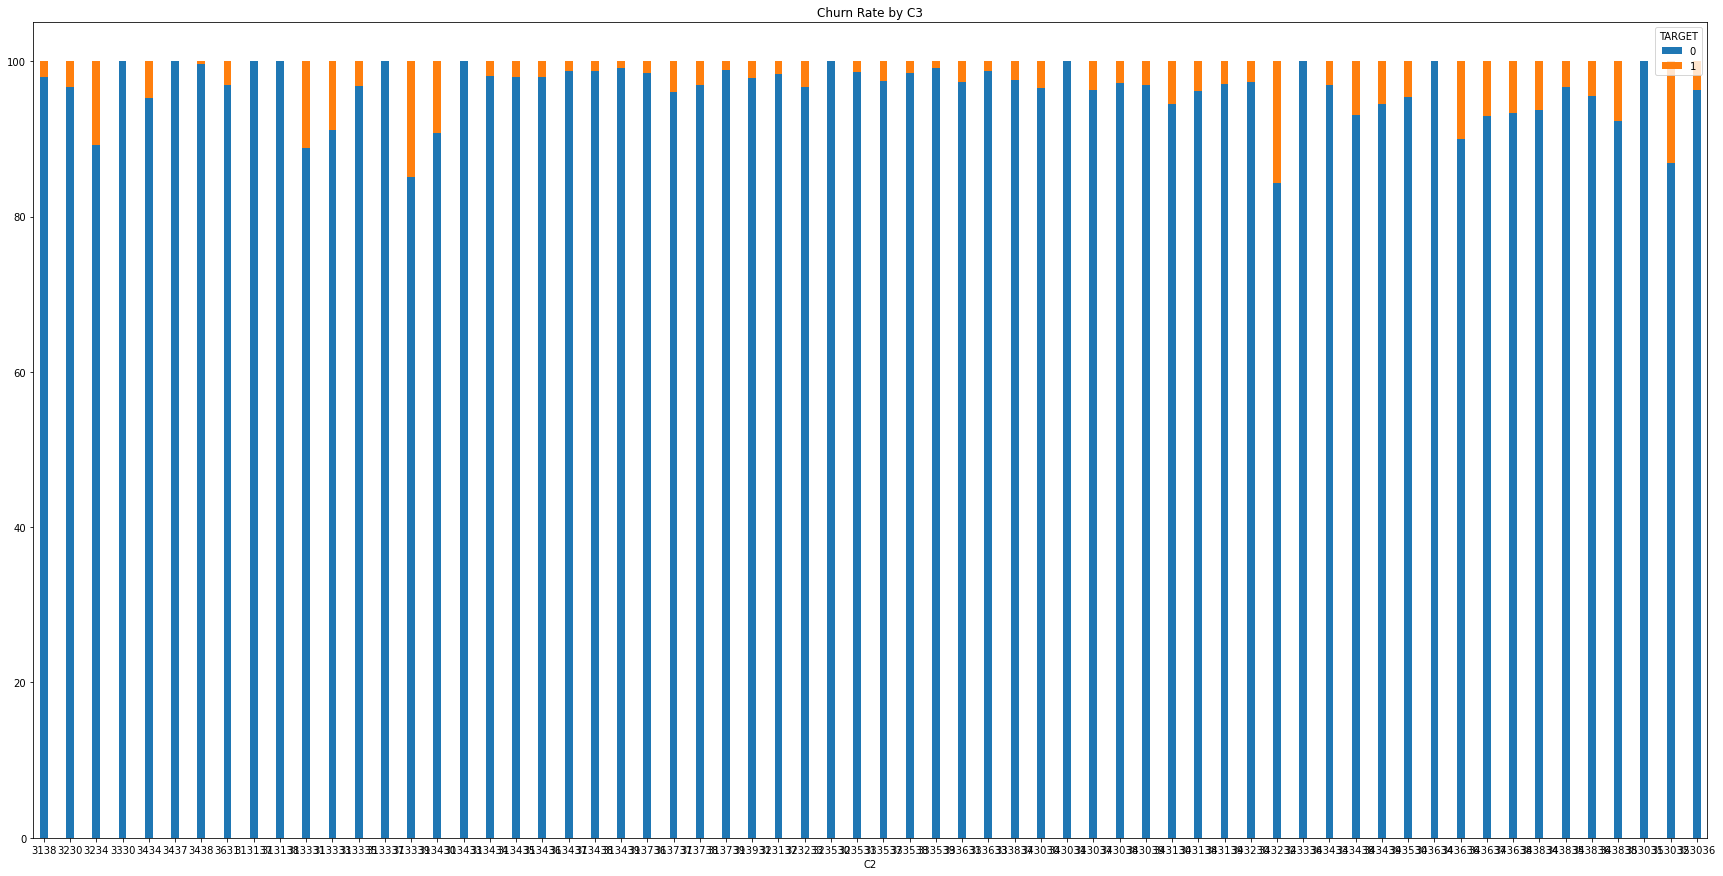

In [15]:
df_c2 = df.groupby(['C2','TARGET']).size().unstack()
ax = (df_c2.T*100/df_c2.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot =0, figsize = (30,15))
plt.title('Churn Rate by C3')

In [16]:
corr = df2.corrwith(df.TARGET)
corr = corr[corr !=1]
positive_corr = corr[corr > 0].sort_values(ascending = False)
negative_corr = corr[corr < 0].sort_values(ascending = False)

print(positive_corr,'\n')

print(negative_corr)

N22    0.008998
N12    0.007511
N23    0.002840
N13    0.000357
dtype: float64 

N1    -0.032743
N2    -0.072853
N9    -0.073879
N7    -0.085459
N5    -0.085705
N11   -0.085736
N8    -0.089221
N4    -0.098212
N10   -0.098275
N17   -0.100772
N3    -0.103473
N6    -0.112715
N16   -0.120381
N19   -0.136018
N18   -0.140730
N15   -0.144046
N21   -0.144113
N14   -0.151683
N20   -0.151852
dtype: float64


<AxesSubplot:>

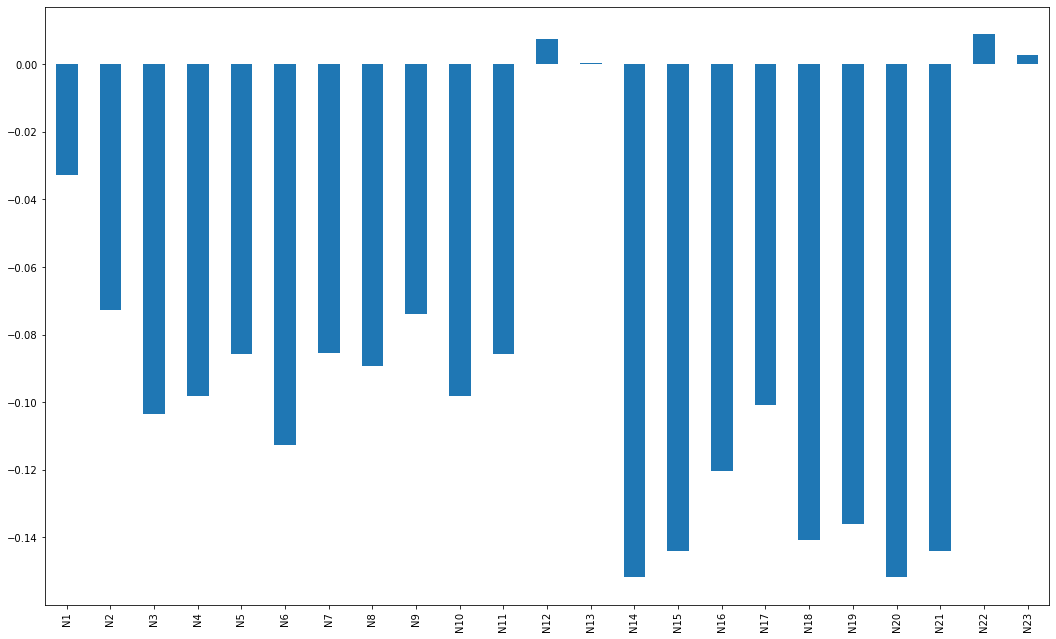

In [17]:
corr.plot.bar(figsize = (18,11))

<AxesSubplot:>

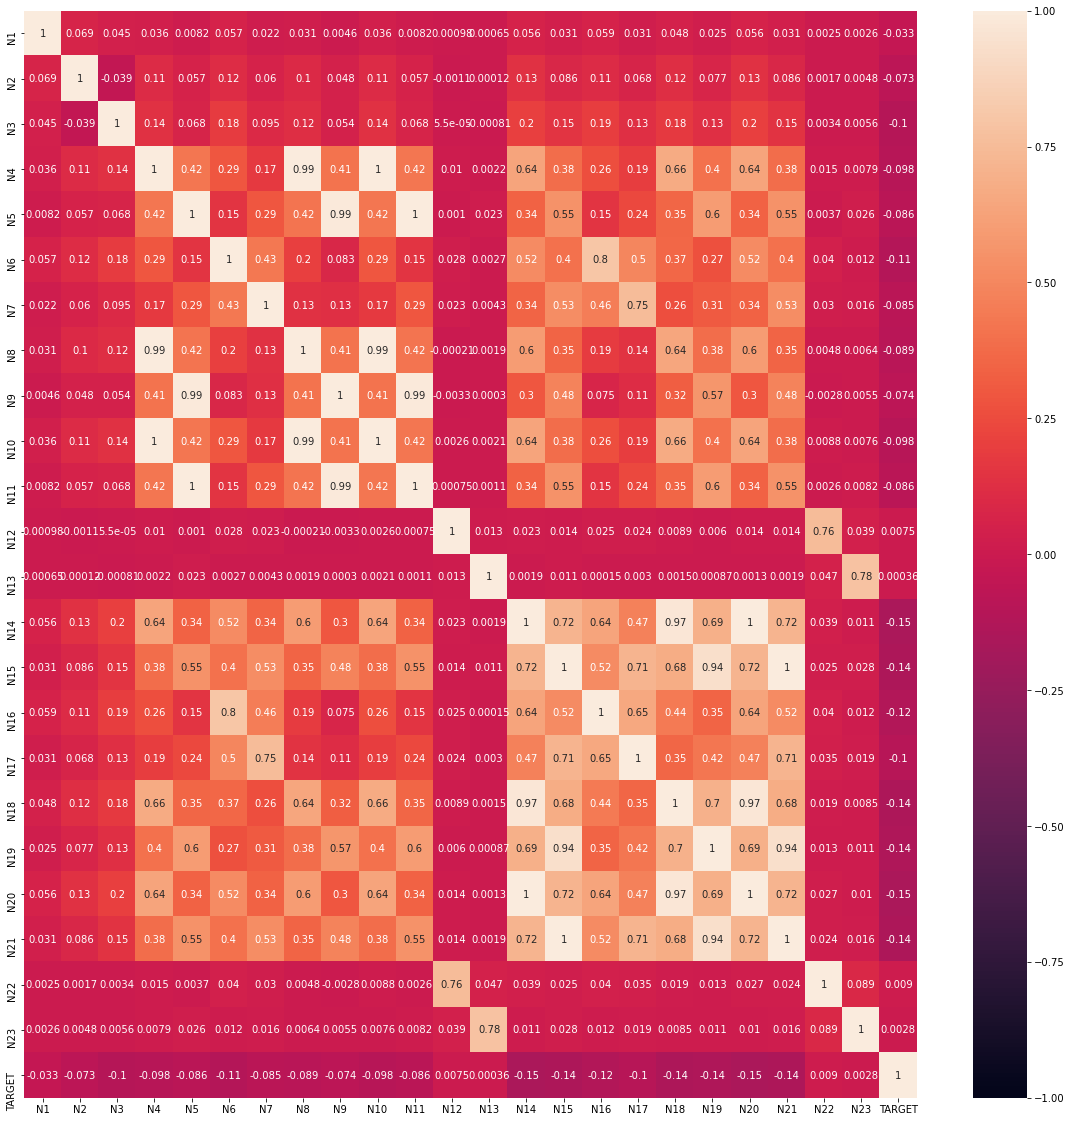

In [18]:
corr = df.iloc[:,3:27].corr()
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(corr, vmax=1, vmin=-1, annot=True, ax = ax)

# Data preprocessing

In [19]:
X = df.iloc[:, 0:25] 
y = df.iloc[:, 26] # Churn 



In [20]:
# Encoding categorical data in X 
from sklearn.preprocessing import LabelEncoder 
  
labelencoder_X_1 = LabelEncoder() 
X['C3'] = labelencoder_X_1.fit_transform(X['C3']) 

#X = pd.DataFrame(X) 
#X = X.drop([0], axis = 1) 
#X = X.drop([1], axis = 1) 

# Create Training and Test sets

In [21]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size = 0.2,  
                                                    random_state = 0) 

train_indentity = X_train['C1']
X_train = X_train.drop(columns = ['C1','C2'])

test_identity = X_test['C1']
X_test = X_test.drop(columns = ['C1','C2'])

In [22]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

# Train model

In [23]:

from sklearn.ensemble import RandomForestClassifier 
  
# Instantiate the classifier 
clf = RandomForestClassifier() 
  
# Fit to the training data 
clf.fit(X_train, y_train) 

RandomForestClassifier()

In [24]:
y_pred = clf.predict(X_test) 

In [25]:
from sklearn.metrics import accuracy_score 
  
accuracy_score(y_test, y_pred) 

0.9500107001809304

In [26]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 

[[96001  1719]
 [ 3420  1662]]


In [27]:
#probability score
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob = y_pred_prob [:,1]

In [28]:
final_results = pd.concat([test_identity,y_test], axis = 1).dropna()

final_results['predictions'] = y_pred

final_results['propensity_to_churn (%)'] = y_pred_prob

final_results['propensity_to_churn (%)']= final_results['propensity_to_churn (%)']*100

final_results['propensity_to_churn (%)'] = final_results['propensity_to_churn (%)'].round(2)

final_results.rename(columns = {'TARGET':'Churn'}, inplace = True)

final_results = final_results[['C1','Churn','predictions','propensity_to_churn (%)']]


print(final_results.sort_values(by='propensity_to_churn (%)', ascending=False))

                      C1  Churn  predictions  propensity_to_churn (%)
400375  3230343533393030      0            1                    97.98
29511   3531393431323333      0            1                    97.25
112287  3333363033393034      0            1                    94.00
129526  3431373332353233      0            1                    94.00
240627  3334343835353833      0            1                    93.67
...                  ...    ...          ...                      ...
201569  3435353031343135      0            0                     0.00
377331  3335353937393235      0            0                     0.00
84335   3233393531353536      0            0                     0.00
332267  3335353032313033      0            0                     0.00
227901  3332373730393434      0            0                     0.00

[102802 rows x 4 columns]
